In [1]:
from tqdm import tqdm
from time import sleep


In [7]:
with tqdm(total=100) as pbar:
    for i in range(10):
        sleep(0.5)
        pbar.update(10)

100%|██████████| 100/100 [00:05<00:00, 19.93it/s]


In [8]:
pbar = tqdm(total=100)
for i in range(10):
    sleep(0.1)
    pbar.update(10)
pbar.close()

100%|██████████| 100/100 [00:01<00:00, 98.79it/s]


In [18]:
 
tensorboard --logdir /home/bj/data/dnn/cfnet_venv/Wave-U-Net-Pytorch/logs/waveunet

NameError: name 'logdir' is not defined

In [3]:
import numpy as np
np.random.uniform(1,5,10)

array([1.9897749 , 3.95969322, 2.41954068, 2.28468753, 4.12756583,
       3.49987049, 3.6202154 , 1.12590794, 3.41110954, 2.21334866])

In [8]:
from sortedcontainers import SortedList
sl = SortedList(['a','c','e','d','k'])
print(sl)
sl *= 10 
print(sl)
sl.count('c')


SortedList(['a', 'c', 'd', 'e', 'k'])
SortedList(['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k'])


10

In [7]:
class a():
    def __init__(self):
        self.b = 1
    def c(self):
        self.d = 2
    def p(self):
        print(self.e)    

aa = a()
aa.e = 3

aa.e


3

In [1]:
a = [1,2,3,4,5]
for i in reversed(a):
    print(i)

5
4
3
2
1


In [10]:
from functools import partial
def f(a,b,c):
    print(a)
    print(b)
    print(c)


d = partial(f,c=3)    

 

TypeError: f() missing 1 required positional argument: 'b'

/home/bj/data/dnn/cfnet_venv/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1024
  return f(*args, **kwargs)
/home/bj/data/dnn/cfnet_venv/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


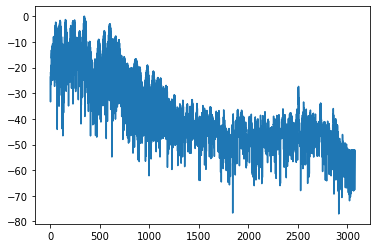

/tmp/ipykernel_29639/276753922.py:20: FutureWarning: Pass y=[-0.00134679 -0.00252167 -0.00099272 ... -0.00018866  0.00012884
 -0.00014141] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)


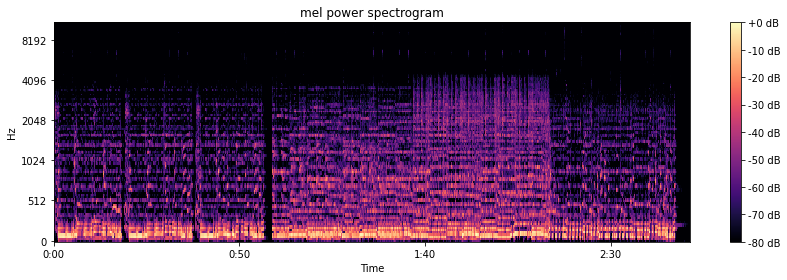

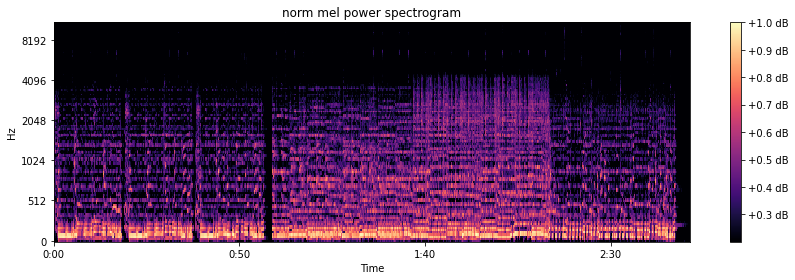

ㄱㅡㄴㅡㄴ ㄱㅙㄴㅊㅏㄶㅇㅡㄴ ㅊㅓㄱ ㅎㅏㄹㅕㄱㅗ ㅇㅐㅆㅡㄴㅡㄴ ㄱㅓㅅ ㄱㅏㅌㅇㅏㅆㄷㅏ
2
140


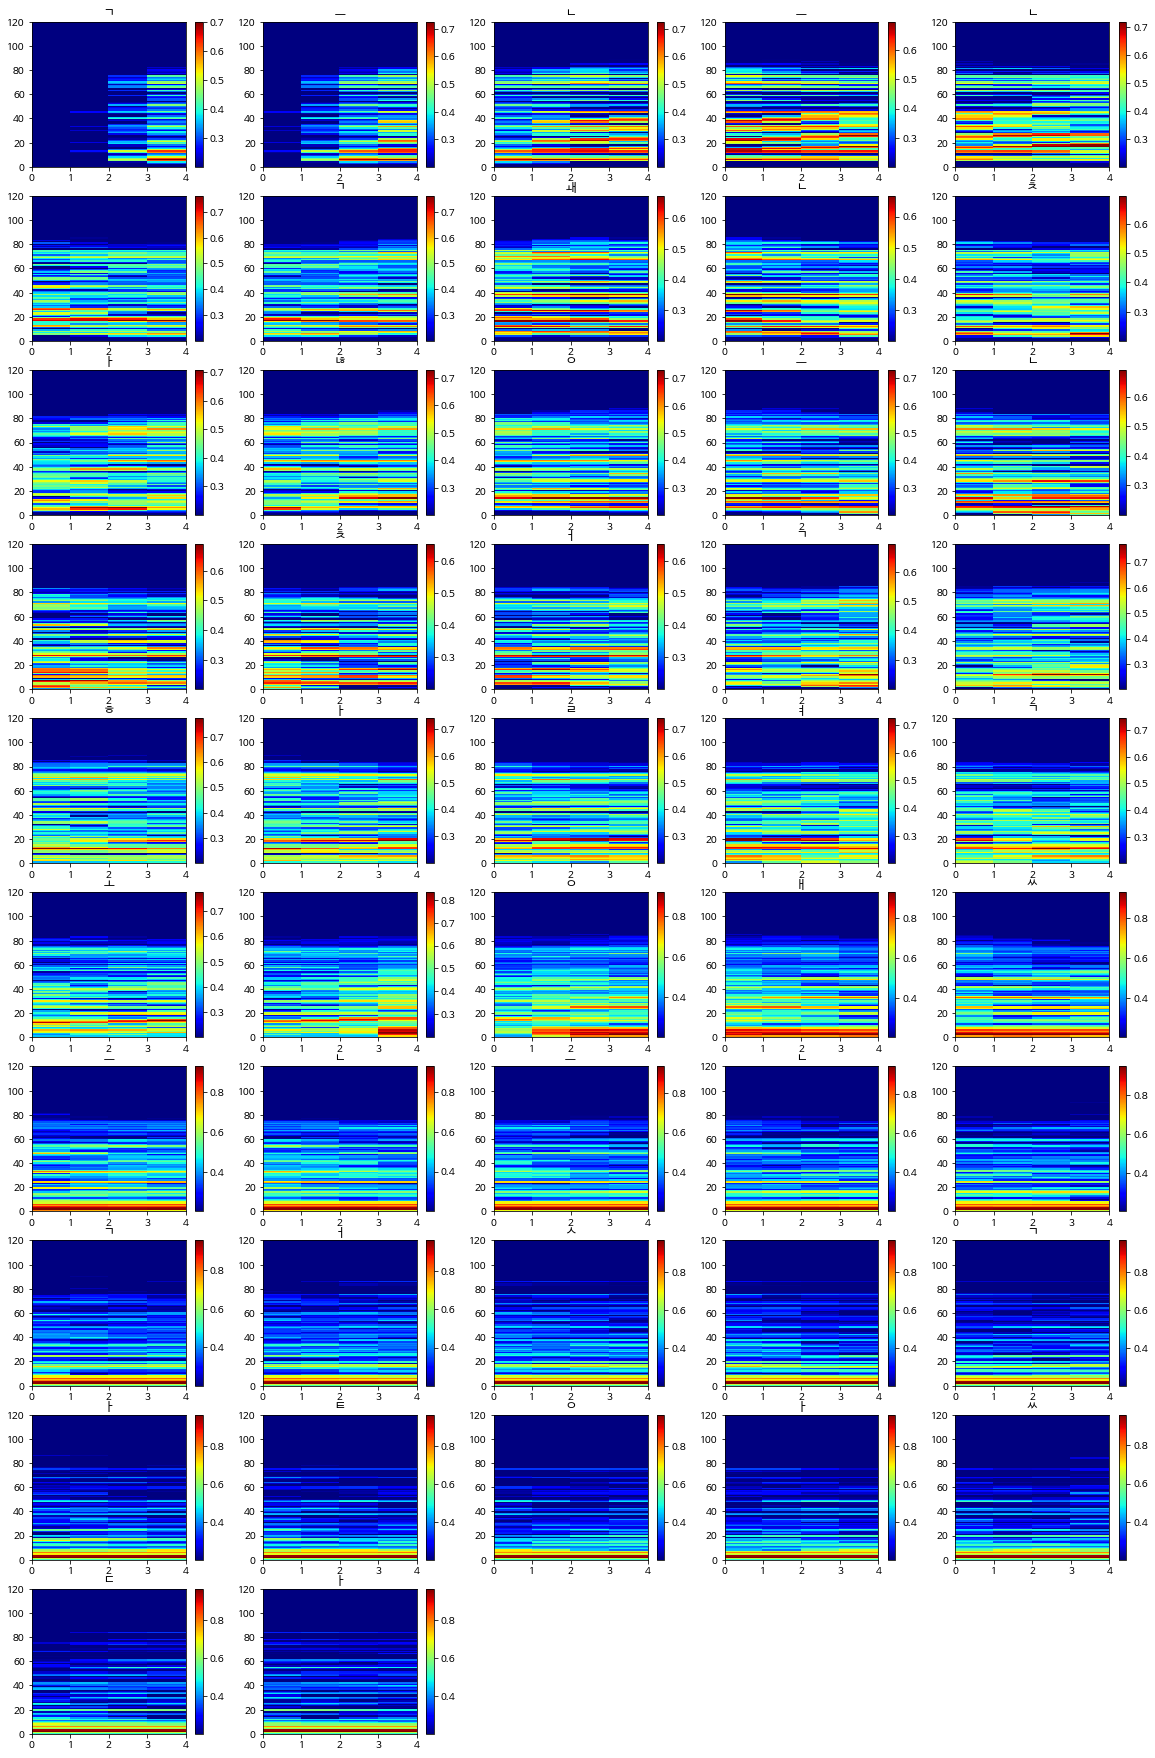

In [8]:
import librosa
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
%matplotlib inline
audio_path = '/home/bj/data/dnn/cfnet_venv/music_data/musdb18-hq/train/a/mixture.wav'
y, sr = librosa.load(audio_path)
ori_sent = '그는 괜찮은 척 하려고 애쓰는 것 같았다'

IPython.display.Audio(data=y, rate=sr) # 오디오 play

D = librosa.amplitude_to_db(librosa.stft(y[:1024]), ref=np.max)
plt.plot(D.flatten())
plt.show()

#MFCC
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128) 
log_S = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()

#Normalization 이미지 처럼 0~1값으로
min_level_db = -100 
def _normalize(S): 
    return np.clip((S - min_level_db) / -min_level_db, 0, 1)
norm_S = _normalize(log_S)
plt.figure(figsize=(12, 4))
librosa.display.specshow(norm_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('norm mel power spectrogram')
plt.colorbar(format='%+0.1f dB')
plt.tight_layout()
plt.show()

#음성데이터 자르기
import hgtk 
jamo_sent = hgtk.text.decompose(ori_sent)
jamo_sent = jamo_sent.replace('ᴥ', '')
print(jamo_sent)

time_frame_num = 140
mel_freq_num = 120
char_frame_num = int(time_frame_num / len(jamo_sent)) #가로 사이즈
print(char_frame_num)
print(time_frame_num)


mpl.rc('font', family="NanumBarunGothic")
plt.figure(figsize=(20, 150))
jamo_sent_size = len(jamo_sent)
for i in range(0, jamo_sent_size): 
    plt.subplot(jamo_sent_size, 5, i+1) 
    start_position = (i * char_frame_num) - 1
    end_position = ((i+1) * char_frame_num) + 1
    if(start_position < 0):
        start_position = 0
        end_position = end_position + 1
    if(end_position > time_frame_num):
        start_position = start_position - (end_position - time_frame_num)
        end_position = time_frame_num
    window = norm_S[0:mel_freq_num, start_position:end_position]
    plt.pcolor(window, cmap='jet')
    plt.title(str(jamo_sent[i]))
    plt.colorbar()
#https://banana-media-lab.tistory.com/entry/Librosa-python-library로-음성파일-분석하기 [Banana Media Lab:티스토리]

In [34]:
import h5py
import numpy as np
with h5py.File('/home/bj/data/dnn/cfnet_venv/Wave-U-Net-Pytorch/hdf/train.hdf5', "r") as f :
    
    print(len(f), f.keys())
    print(f.keys())
    print(f.values())
    print(f.attrs.keys())
    print(len(f['0']), f['0'].keys())
    print(f['0'].attrs.keys())
    print(f['0'].attrs.values())
    print(f['0'].attrs.items())
 


3 <KeysViewHDF5 ['0', '1', '2']>
<KeysViewHDF5 ['0', '1', '2']>
ValuesViewHDF5(<HDF5 file "train.hdf5" (mode r)>)
<KeysViewHDF5 ['channels', 'instruments', 'sr']>
2 <KeysViewHDF5 ['inputs', 'targets']>
<KeysViewHDF5 ['length', 'target_length']>
ValuesViewHDF5(<Attributes of HDF5 object at 140029328456176>)
ItemsViewHDF5(<Attributes of HDF5 object at 140029328456176>)


In [44]:
from sortedcontainers import SortedList
lengths = [1,2,3,4,5,6,7]
start_pos = SortedList(np.cumsum(lengths))
length = start_pos[-1]
print(start_pos)
for i in range(10):
    audio_idx = start_pos.bisect_right(i) # i+ 로 잘라버리면 몇개 남지?
    print(audio_idx)
for i in range(10):    
    audio_idx = start_pos.bisect_left(i) # i- 로 잘라버리면 몇개 남지?
    print(audio_idx)


SortedList([1, 3, 6, 10, 15, 21, 28])
0
1
1
2
2
2
3
3
3
3
0
0
1
1
2
2
2
3
3
3
